In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm as npnorm
%matplotlib inline

# Assignment 6

** Problem 1 ** - 5 pts: Problem 2.3

** Problem 2 ** - 5 pts: Problem 2.5

** Problem 3 ** - 10 pts: Adapt the code from class to find the Lyupanov exponent of the chaotic attractor of the Ikeda map
\begin{align}
x_{n+1} = & 1 + u\left(x_{n}\cos(\theta_{n}) - y_{n}\sin(\theta_{n}) \right)\\
y_{n+1} = & u\left(x_{n}\sin(\theta_{n}) + y_{n}\cos(\theta_{n}) \right),
\end{align}
where $u = .9$ and 
$$
\theta_{n} = .4 - \frac{6}{1 + x_{n}^{2} + y_{n}^{2}}.
$$
Again, give some justification for why you think you have converged onto your result and how you know you have chosen initial conditions in the basin of attraction of the attractor.  Also, feel free to use any symbolic program to compute the Jacobian of that map.    

** Problem 4 ** 20 pts: Consider the following two-dimensional map $M$:

$$
M: \left\{
\begin{array}{rcl}
x_{n+1}&=& y_n \\[1.0ex]
y_{n+1}&=& (a+b\,y_{n}^2)\, y_n - x_n
\end{array}
\right.
$$
with $a=2.75$ and $b=-100$ (unless stated otherwise).

A.

(i) Find the fixed point(s) of $M$

(ii) classify its(their) stability as a function of $a$ and $b$ 
(i.e., for arbitrary values of $(a,b)$).  

(iii) What are the conditions on $a$ and $b$ such that the 
origin  (0,0) is a saddle point?

B. 

(i) Find the period-2 orbit $\{x_{2,1},x_{2,2}\}$ 
as a function of $a$ and $b$. 

(ii) Plot the eigenvalues for this periodic orbit as a function of $a$ (yes, they depend only on $a$).

(iii) Using this plot determine the stability of the period-2
orbit as a function of $a$.

(iv) In particular, what is its stability for $a=2.75$ and $b=-100$?

C. 

(i) For arbitrary values of $(a,b)$, find the inverse of $M$. 

(ii) What is the similarity between $M$ and its inverse? 
[Compare $M^{-1}(y,x)$ with $M(x,y)$].
What does this tell you about the symmetry
of fixed points/orbits/manifolds/etc.? Explain.

(iii) What happens to the map after applying the transformations: $(x,y)\rightarrow (y,x)$ and $(x,y)\rightarrow (-x,-y)$? i.e., compare $M(x,y)$ with $M(-y,-x)$.

(iv) What does this tell you about the symmetries of orbits and stable and unstable manifolds? Is this congruent/related with your conclusions from (ii)?

D. 

(i) Compute the stable and unstable manifolds of the origin ($a=2.75$ and $b=-100$) in the first quadrant. 

(ii) Comment on the nature (symmetries) of these manifolds. 

(iii) What is the behavior of orbits starting at points lying on the intersection between the stable and unstable manifolds? 

In [16]:
def weird_map_2d(a,b,xpt):
    xn = np.zeros(xpt.shape)
    xn[:,0] = xpt[:,1]
    xn[:,1] = (a+b*(xpt[:,1])**2.)*xpt[:,1] - xpt[:,0]
    return xn

In [17]:
def inv_weird_map_2d(a,b,xpt):
    xn = np.zeros(xpt.shape)
    xn[:,0] = (a+b*(xpt[:,0])**2.)*xpt[:,0] - xpt[:,1]
    xn[:,1] = xpt[:,0]
    return xn

In [18]:
def recursive_cut(a,b,al,ar,f,cpoints):
    fal = f(a,b,al)
    far = f(a,b,ar)
    if npnorm(far-fal) <= 1e-6:
        ali = np.zeros((1,2))
        ari = np.zeros((1,2))
        ali[0,:] = al
        ari[0,:] = ar
        cpoints = np.append(cpoints,ali,axis=0)
        cpoints = np.append(cpoints,ari,axis=0)
    else:
        am = (ar+al)/2.
        cpoints = recursive_cut(a,b,al,am,f,cpoints)
        cpoints = recursive_cut(a,b,am,ar,f,cpoints) 
    return cpoints

In [19]:
def mani_make(a,b,avec,bvec,f,man,cmax,clr):
    
    man = recursive_cut(a,b,avec,bvec,f,man)
    
    plt.scatter(man[:,0],man[:,1],color=clr,s=.1)
    cnt = 0
    
    while cnt < cmax:
        man = f(a,b,man)
        plt.scatter(man[:,0],man[:,1],color=clr,s=.1)
        cnt+=1
        
    plt.xlim((-.01,.15))
    plt.ylim((-.01,.15))

In [20]:
def weird_map_manifold(a,b,tol,cmax):
    
    fp1 = 0.
    
    evlpp = .5*(a + np.sqrt(a**2. - 4.))
    evlpm = .5*(a - np.sqrt(a**2. - 4.))
    
    uvec = np.array([1.,evlpp])
    svec = np.array([1.,evlpm])
    fxpt = np.array([fp1,fp1])
        
    # Build the Stable Manifold S(p)    
        
    avals = fxpt + tol*svec/npnorm(svec)
    avec = np.zeros((1,2))
    avec[0,:] = avals
    bvec = inv_weird_map_2d(a,b,avec)
    
    sman = np.zeros((1,2))
    sman[0,:] = fxpt
    mani_make(a,b,avec,bvec,inv_weird_map_2d,sman,cmax,'b')
    
    # Build the Unstable Manifold U(p)    
        
    avals = fxpt + tol*uvec/npnorm(uvec)
    avec = np.zeros((1,2))
    avec[0,:] = avals
    bvec = weird_map_2d(a,b,avec)
    
    uman = np.zeros((1,2))
    uman[0,:] = fxpt
    mani_make(a,b,avec,bvec,weird_map_2d,uman,cmax,'r')


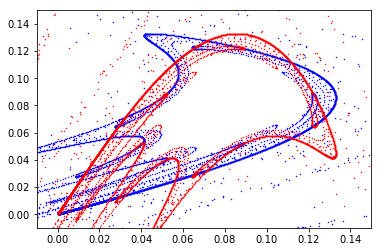

In [22]:
weird_map_manifold(2.75,-100.,1e-4,20)